# Error propagation 

## Motivation

Say we have some function $f(x)$. We have measurements of the variable $x$ with some error $\sigma_x$. We want to know the error in $f(x)$.

The uncertainty in $f(x)$ depends on $\sigma_x$ and the derivative $df/dx$.

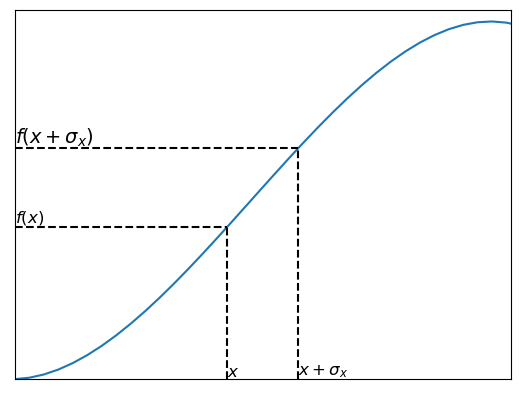

In [36]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10)
x1 = 3
sigma1 = 1

def f(x):
    f = -x**3 + 10*x**2 + x
    return f

plt.figure()
plt.plot(x, f(x))

plt.plot([x1, x1],[0, f(x1)], 'k--')
plt.plot([x1 + sigma1, x1 + sigma1],[0, f(x1 + sigma1)], 'k--')

plt.plot([0, x1],[f(x1), f(x1)], 'k--')
plt.plot([0, x1 + sigma1],[f(x1 + sigma1), f(x1 + sigma1)], 'k--')


plt.xlim([0, 7])
plt.ylim([0, 160])

plt.text(0, f(x1), '$f(x)$', fontsize = 12, verticalalignment = 'bottom')
plt.text(0, f(x1 + sigma1), '$f(x + \sigma_x)$', fontsize = 14, verticalalignment = 'bottom')

plt.text(x1, 0, '$x$', fontsize = 12, verticalalignment = 'bottom')
plt.text(x1 + sigma1, 0, '$x + \sigma_x$', fontsize = 12, verticalalignment = 'bottom')

plt.xticks([]) 
plt.yticks([]);

$$\frac{df}{dx} \approx \frac{f(x + \sigma_x) - f(x)}{\sigma_x} $$

$$ \sigma_x \frac{df}{dx} \approx f(x + \sigma_x) - f(x)$$

## How error propagates through calculations and anlysis

Now imagine you have three variables: <br>
$a$, $b$, $c$ <br>
Each of those variables has a measure of uncertainty: <br>
$\sigma_a,\sigma_b,\sigma_c$

We want to know the uncertainty of a calculated variable $y = f(a,b,c)$ 

### Oceanographic example

An oceanographic example would be density, which is usually expressed as a function of temperature, salinity and pressure. Oceanographers measure these parameters with a CTD (conductivity, temperature and depth) instrument. This instrument does measure salinity directly. Salinity is calculated as a function of conductivity, temperature and pressure. This means that errors in salinity are not independent of errors in temperature. When estimating the uncertainty in density, we have to think about how the errors in salinity and temperature co-vary.

### General equation for uncertainty

What is the uncertainty of y when measurements are dependant/inter-related?

$\sigma_y^2 \approx \sigma_a^2 \left(\frac{\partial y}{\partial a}\right)^2 +\sigma_b^2 \left(\frac{\partial y}{\partial b}\right)^2 + \sigma_c^2\left(\frac{\partial y}{\partial c}\right)^2 + 2\sigma_{ab} ^2 \left(\frac{\partial y}{\partial a}\right)\left(\frac{\partial y}{\partial b}\right) + 2\sigma_{bc}^2 \left(\frac{\partial y}{\partial b}\right)\left(\frac{\partial y}{\partial c}\right) + 2\sigma_{ac}^2 \left(\frac{\partial y}{\partial a}\right) \left(\frac{\partial y}{\partial c}\right)$

This equation shows that the uncertainty in the calculated variable $y$ depends on:

* The uncertainty in the measurement variables ($\sigma_a,\sigma_b,\sigma_c$)

* The covariance among measurment variables ($\sigma_{ab}^2,\sigma_{bc}^2,\sigma_{ac}^2$)

* The relationship between magnitudes of the measurement variables and calculated variable ($\partial y$/$\partial a$, $\partial y$/$\partial b$, $\partial y$/$\partial c$)

### Simplified equation for uncertainty, if errors are uncorrelated

If the errors are uncorrelated, the covariance terms are zero and the above equation simplifies to

$\sigma_y^2 \approx \sigma_a^2 \left(\frac{\partial y}{\partial a}\right)^2 +\sigma_b^2 \left(\frac{\partial y}{\partial b}\right)^2 + \sigma_c^2\left(\frac{\partial y}{\partial c}\right)^2$

## Special cases<br>

Rules for error propagation in common operations can be derived from the equation above. If there all measurement variables are independent, then the terms involving covariance become zero. The examples listed below assume no correlation between measurement variables.

A more complete table, including covariance terms, can be found on Wikipedia:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas


### Addition, subtractions 

$y = a + b - c$

_error:_

$\sigma_y ^2  = \sigma_a ^2(1)^2 + \sigma_b ^2(1)^2 + \sigma_c ^2(-1)^2$

$\sigma_y ^2  = \sigma_a ^2 + \sigma_b ^2 + \sigma_c ^2$

### Multiplication, division

$y = \frac{ab}{c}$

_error_:

$\sigma_y ^2  = \sigma_a ^2\left(\frac{b}{c}\right)^2 + \sigma_b ^2\left(\frac{a}{c}\right)^2 + \sigma_c ^2\left(\frac{-ab}{c^2}\right)^2$

_relative error:_

$\left(\frac{\sigma_y }{y}\right)^2 = \left(\frac{\sigma_a }{a}\right)^2 + \left(\frac{\sigma_b }{b}\right)^2 + \left(\frac{\sigma_c }{c}\right)^2$

### Multiplying by an exact number

$y=ma$

_error:_

$(\sigma_y) = m(\sigma_a)$

_relative error:_

$\left(\frac{\sigma_y}{y}\right)^2 = \left(\frac{\sigma_a}{a}\right)^2$

### Power

$y = a^m$

$(\frac{\sigma_y}{y})^2 = (m \frac{\sigma_a}{a})^2$

### Natural log 

$y= \ln{a}$

$\sigma_y = |\frac{\sigma_a}{a}|$

### Log, base 10

$y = \log_{10}{a}$

$\sigma_y = |0.434 \frac{\sigma_a}{a}|$

### Exponential

$y = e^a$

$\sigma_y = |y \sigma_a|$

### Exponential, base 10

$y = 10^a$ 

$\sigma_y = |2.303 y \sigma_a|$

## Python uncertainties package

The [uncertainties](https://pythonhosted.org/uncertainties/) package in Python makes it easy to keep track of uncertainties in complicated equations and account for correlations, which are ignored in the special cases above.

### Example

__Example__: Measure diameter of a sphere:

relative error = 10%

Error in calculating volume?

$V = \frac{4}{3} \pi r^3$

This problem can be approached by breaking it into several parts. First, we have the relative error in measuring the diameter, what is the error in calculating the radius, 

$r = \frac{1}{2}d$?

The _absolute error_ changes when calculating the radius,

$$\sigma_r = \frac{1}{2} \sigma_d$$

but the _relative error_ does not,

$$\frac{\sigma_r}{r} = \frac{\sigma_d}{d}$$

Similarly, the relative error of the volume, $V$, is equal to the relative error in calculating $r^3$,

$$\frac{\sigma_V}{V} = \frac{\sigma_{r^3}}{r^3}$$

The error in $r^3$ can be found by using the rule for powers,

$$\left(\frac{\sigma_{r^3}}{r^3}\right) = 3 \left(\frac{\sigma_r}{r}\right)$$

which is equivalent to 

$$\left(\frac{\sigma_{V}}{V}\right) = 3 \left(\frac{\sigma_d}{d}\right)$$

$$\left(\frac{\sigma_{V}}{V}\right) = 3 \left(0.1\right) = 0.30$$


This result can be checked with the uncertainties package.

In [3]:
from uncertainties import ufloat
import numpy as np

d = ufloat(10,0.1)
V = (4/3)*np.pi*(0.5*d)**3
V.std_dev/V.nominal_value

0.029999999999999995

## Application: Marine Carbonate Chemistry

![images/carbonate_example.png](images/carbonate_example.png)

[source](http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap6.html)

Relative concentrations of dissolved CO2 and carbonate ions in seawater are determined by pH pf seawater and dissociation constants $K_1'$ and $K_2'$

DIC = dissolved inorganic carbon

DIC = [CO2] + [HCO3-] + [CO3-2]


$CO_2 + H_2 O \iff HCO_{3}^- + H^+$

$k_1'= \frac{[HCO3-][H^+]} {[CO_2]}$

$HCO_3 ^- \iff CO_3 ^2- +H^+$

$k_2' =\frac{ [CO3- ^2-][H^+]}{[HCO_3 ^-]}$


partial pressure of CO2

$pCO2 = \frac{[CO2]}{K_{h,CO_2}}$
Henry's law constant = 3.24X10$^-2$ $\frac{mol}{kg atm}$ at 20 degrees C, s=35 PSU

$pK_1' = 5.847$

$pK_2' = 8.966$

$pH = -\log_{10}{[H^+]} \to [H^+] = 10^{-pH}$

$pK_1' = -\log_{10}{K_1'} \to K_1' = 10^{-pK}$

We can measure pCO_2 and pH well, but not DIC, but not alkalinity

$[CO_2] = \frac{DIC} {1 + \frac{k_1'}{H^+} + \frac{k_1' k_2'}{[H^+]^2}}$


Analytical error in pH = 0.0020<br>
Analytical error in DIC = umol kg-1

What is the $\sigma_{H^+}$?

$\sigma_{H^+} = 2.303[H^+]\sigma_{pH}$

To get the order of magnitude assume a pH around 8.2 (typical for seawater)

$[H^+] \approx 10^{-8.2}$


Chemical oceanographers may be interested in knowing the error in calculating the partial pressure of CO2 in seawater from these measurements. The PYCO2SYS package provides [tools for propagating uncertainty](https://pyco2sys.readthedocs.io/en/latest/uncertainty/) in its carbonate system calculations.